In [1]:
# Import all necessary libraries

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split


In [2]:
insurance =pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")


In [3]:
X = insurance.drop("charges", axis = 1)
y = insurance["charges"]

In [4]:
# Create training and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [5]:
# Create column transformer

ct = make_column_transformer(
    (
        (MinMaxScaler(), ["age", "bmi", "children"])
    ),
    (
        (OneHotEncoder(handle_unknown = "ignore"), ["sex", "smoker", "region"])
    )
)

# fit the training data

ct.fit(X_train)

# Now we normalize our data

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [6]:
# Now, build model

tf.random.set_seed(42)

#                   1. Create a model

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(200, activation = "relu"),
    tf.keras.layers.Dense(200),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10)
])



#                   2. Compile a model

insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1),
                        metrics = ["mae"])



#                   3. Fitting a model

loss = insurance_model.fit(X_train_normal, y_train, epochs = 1000)

Epoch 1/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 8779.3096 - mae: 8779.3096  
Epoch 2/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3770.4119 - mae: 3770.4119
Epoch 3/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3309.2812 - mae: 3309.2812
Epoch 4/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3019.7573 - mae: 3019.7573
Epoch 5/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3926.1670 - mae: 3926.1670
Epoch 6/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2850.8491 - mae: 2850.8491
Epoch 7/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3686.3250 - mae: 3686.3250
Epoch 8/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2902.0249 - mae: 2902.0249
Epoch 9/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2950.7949 - mae: 2950.7949
Epoch 10/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2879.6384 - mae: 2879.6384
Epoch 11/1000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3017.3110 - mae: 3017.3110
Epoch 12/1000
34/34 ━━━━━━━━━━━━━━━━━━━

In [7]:
# evaluate the model

insurance_model.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1346.5242 - mae: 1346.5242


[1467.8504638671875, 1467.8504638671875]

Text(0.5, 0, 'Epochs')

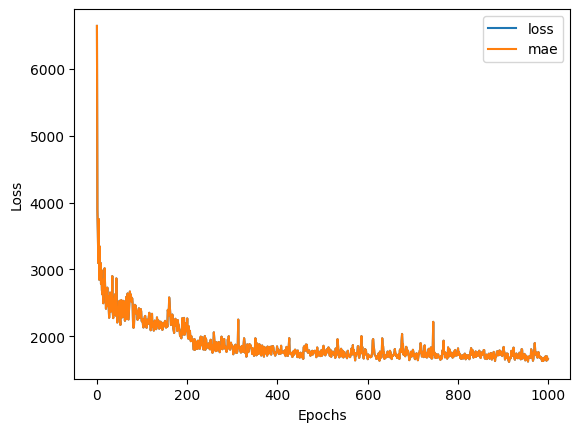

In [8]:
pd.DataFrame(loss.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")

> ### Saving the best model

> Saving model

In [9]:
insurance_model.save("../../Saved Models/Insurance_Model.h5")

> Loading model

In [12]:
loaded_insurance_model = tf.keras.models.load_model("../../Saved Models/Insurance_Model.h5")

In [14]:
loaded_insurance_model.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1346.5242 - mean_absolute_error: 1346.5242


[1467.8504638671875, 1467.8504638671875]